<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/Loan%20Approval%20Health%20Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sample_data/lending_club_loan_two.csv')

In [37]:
def mappingFunc(valueToChange):
    if(valueToChange == "Fully Paid"):
        return 1
    else:
        return 0

loan_repaid = map(mappingFunc, df['loan_status'])
loan_repaid = pd.DataFrame(loan_repaid)
df['loan_repaid'] = loan_repaid

df = df.drop('emp_title', axis=1)
df = df.drop('emp_length', axis=1)
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
df = df.dropna()

df['term'] = df['term'].apply(lambda term: int(term[:3]))

df = df.drop('grade', axis=1)

dummies = pd.get_dummies(df['sub_grade'], drop_first=True) # This is getting dummy variable for sub_grade. drop_first must be tru
# This is concatenating the newly created column into the dataframe
# Also this is dropping the original column sub_grade which is no longer needed
df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True) # This is getting dummy variable for sub_grade. drop_first must be tru
# This is concatenating the newly created column into the dataframe
# Also this is dropping the original column sub_grade which is no longer needed
df = pd.concat([df.drop( ['verification_status', 'application_type','initial_list_status','purpose'], axis=1), dummies], axis=1)

df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'], drop_first=True) # This is getting dummy variable for sub_grade. drop_first must be tru
# This is concatenating the newly created column into the dataframe
# Also this is dropping the original column sub_grade which is no longer needed
df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

df['zip_code'] = df['address'].apply(lambda digit: int(digit[-5:]))
df = df.drop('address', axis=1)

df = df.drop('issue_d', axis=1)

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

df.isnull().values.any()




False

In [38]:
df = df.drop('title', axis=1)

In [39]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = df.drop('loan_status', axis=1)

X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [42]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=64,
          validation_data=(X_test, y_test), 
          )

Epoch 1/500
4919/4919 [==============================] - 20s 4ms/step - loss: 0.4019 - val_loss: 0.3688
Epoch 2/500
4919/4919 [==============================] - 19s 4ms/step - loss: 0.3506 - val_loss: 0.2935
Epoch 3/500
4919/4919 [==============================] - 18s 4ms/step - loss: 0.2978 - val_loss: 0.2830
Epoch 4/500
4919/4919 [==============================] - 18s 4ms/step - loss: 0.2913 - val_loss: 0.2821
Epoch 5/500
4919/4919 [==============================] - 18s 4ms/step - loss: 0.2886 - val_loss: 0.2829
Epoch 6/500
4919/4919 [==============================] - 19s 4ms/step - loss: 0.2878 - val_loss: 0.2790
Epoch 7/500
4919/4919 [==============================] - 20s 4ms/step - loss: 0.2860 - val_loss: 0.2824
Epoch 8/500
4919/4919 [==============================] - 19s 4ms/step - loss: 0.2861 - val_loss: 0.2787
Epoch 9/500
4919/4919 [==============================] - 18s 4ms/step - loss: 0.2850 - val_loss: 0.2839
Epoch 10/500
4919/4919 [==============================] - 19s 4m

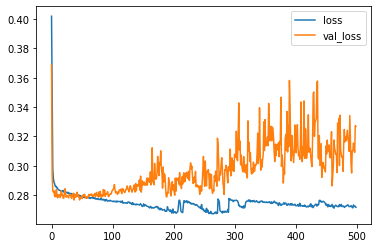

In [44]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()